In [ ]:
# code is inspired from : https://www.geeksforgeeks.org/stacking-in-machine-learning-2/

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [8]:
path = "/content/healthcare-dataset-stroke-data.csv"

df = pd.read_csv(path)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
X = df.copy()

X = X.drop(columns=['id'])

X.head()
print(X.shape)

(5110, 11)


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(X['smoking_status'])
X['smoking_status'] = encoder.transform(X['smoking_status'])
encoder.fit(X['gender'])
X['gender'] = encoder.transform(X['gender'])
encoder.fit(X['ever_married'])
X['ever_married'] = encoder.transform(X['ever_married'])
encoder.fit(X['Residence_type'])
X['Residence_type'] = encoder.transform(X['Residence_type'])
encoder.fit(X['work_type'])
X['work_type'] = encoder.transform(X['work_type'])

X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [11]:
X.dropna(inplace=True)

X.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
y = X['stroke']
X = X.drop(columns='stroke')



In [13]:
from sklearn.preprocessing import StandardScaler

# normalize data to optimize model fit
data_scaler = StandardScaler()

X = data_scaler.fit_transform(X)

X

array([[ 1.19842812,  1.07013796, -0.31806673, ...,  2.77769839,
         0.98134488, -0.35178804],
       [ 1.19842812,  1.64656262, -0.31806673, ...,  0.0138418 ,
         0.45926914,  0.58523176],
       [-0.83302341,  0.27201152, -0.31806673, ...,  1.48413156,
         0.70120668,  1.52225157],
       ...,
       [-0.83302341, -0.34875349, -0.31806673, ..., -0.50236926,
         0.21733161,  0.58523176],
       [ 1.19842812,  0.36069224, -0.31806673, ...,  1.37291993,
        -0.41934612, -0.35178804],
       [-0.83302341,  0.05030973, -0.31806673, ..., -0.45081569,
        -0.34294479, -1.28880785]])

In [14]:
X = X
y = y.values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [16]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier 

In [17]:
model_kNeighborsClassifier = KNC.fit(x_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(x_test)   # Predicting on test dataset

In [18]:
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knc * 100)

print(classification_report(y_test, pred_knc))

accuracy score of KNeighbors Classifier is: 95.68403908794788
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



In [19]:
KNC2 = KNeighborsClassifier(n_neighbors=4) 
KNC2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

In [21]:
pred_rf = RF.predict(x_test)

acc_rf = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier:', acc_rf * 100)

print(classification_report(y_test, pred_rf))

Accuracy of Random Forest Classifier: 95.84690553745928
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       1.00      0.02      0.04        52

    accuracy                           0.96      1228
   macro avg       0.98      0.51      0.51      1228
weighted avg       0.96      0.96      0.94      1228



In [22]:
from sklearn.svm import SVC

SV = SVC(probability=True)

SV.fit(x_train, y_train)

pred_sv = SV.predict(x_test)

acc_sv = accuracy_score(y_test, pred_sv)
print('Accuracy of Support Vector Classifier:', acc_sv * 100)

print(classification_report(y_test, pred_sv))

Accuracy of Support Vector Classifier: 95.76547231270358
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
AB = AdaBoostClassifier()

AB.fit(x_train, y_train)

pred_ab = AB.predict(x_test)

acc_ab = accuracy_score(y_test, pred_ab)
print('Accuracy of AdaBoosting:', acc_ab * 100)

print(classification_report(y_test, pred_ab))

Accuracy of AdaBoosting: 95.92833876221498
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       1.00      0.04      0.07        52

    accuracy                           0.96      1228
   macro avg       0.98      0.52      0.53      1228
weighted avg       0.96      0.96      0.94      1228



In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier 

HG = HistGradientBoostingClassifier()

HG.fit(x_train,y_train)

pred_hg = HG.predict(x_test)

acc_hg = accuracy_score(y_test, pred_hg)
print('Accuracy of AdaBoosting:', acc_hg * 100)

print(classification_report(y_test, pred_hg))


Accuracy of AdaBoosting: 95.11400651465797
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1176
           1       0.21      0.06      0.09        52

    accuracy                           0.95      1228
   macro avg       0.59      0.52      0.53      1228
weighted avg       0.93      0.95      0.94      1228



In [39]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LogisticRegression(max_iter=300)  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[RF, AB, HG, SV, KNC], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [40]:

model_stack = clf_stack.fit(x_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(x_test)

In [41]:

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

accuracy score of Stacked model: 95.60260586319218


In [42]:
print(classification_report(y_test, pred_stack))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.38      0.06      0.10        52

    accuracy                           0.96      1228
   macro avg       0.67      0.53      0.54      1228
weighted avg       0.94      0.96      0.94      1228



In [43]:
from sklearn.metrics import f1_score

f1_knc = f1_score(y_test, pred_knc)
f1_rf = f1_score(y_test, pred_rf)
f1_sv = f1_score(y_test, pred_sv)
f1_hg = f1_score(y_test, pred_hg)
f1_ab = f1_score(y_test, pred_ab)
f1_stack = f1_score(y_test, pred_stack)

Text(0, 0.5, 'F1 Score')

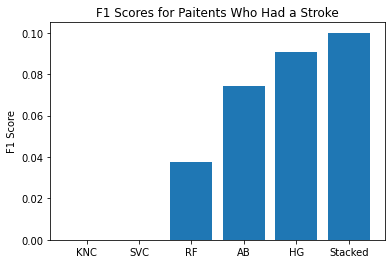

In [48]:
plt.bar(x=['KNC','SVC','RF','AB','HG','Stacked'], height= [f1_knc, f1_sv, f1_rf, f1_ab, f1_hg ,f1_stack])
plt.title('F1 Scores for Paitents Who Had a Stroke')
plt.ylabel('F1 Score')